In [59]:
import numpy as np
import pandas as pd
import datetime as dt
import math as math

In [2]:
weather = pd.read_csv('WeatherEvents_Jan2016-Dec2022.csv') #1GB so takes some time

In [3]:
weather.shape

(8627181, 14)

In [4]:
weather.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [5]:
weather.tail()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
8627176,W-9091890,Snow,Light,2022-12-21 23:00:00,2022-12-21 23:42:00,0.01,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
8627177,W-9091891,Snow,Moderate,2022-12-21 23:42:00,2022-12-21 23:53:00,0.04,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
8627178,W-9091892,Cold,Severe,2022-12-21 23:53:00,2022-12-24 02:53:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
8627179,W-9091893,Cold,Severe,2022-12-24 03:53:00,2022-12-24 07:53:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
8627180,W-9091894,Cold,Severe,2022-12-24 09:53:00,2022-12-24 11:53:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


In [6]:
#count nulls
weather.isna().sum()

EventId                  0
Type                     0
Severity                 0
StartTime(UTC)           0
EndTime(UTC)             0
Precipitation(in)        0
TimeZone                 0
AirportCode              0
LocationLat              0
LocationLng              0
City                 16912
County                   0
State                    0
ZipCode              69199
dtype: int64

In [7]:
nunique = len(weather.AirportCode.unique())
nunique

2071

In [8]:
weather.Type.unique()

array(['Snow', 'Fog', 'Cold', 'Storm', 'Rain', 'Precipitation', 'Hail'],
      dtype=object)

In [9]:
types = ['Cold', 'Fog', 'Hail', 'Rain', 'Snow', 'Storm', 'Precipitation']

columnTypes = []
for i in types:
    columnTypes.append('in' + i)
    columnTypes.append('sec' + i)

#make df for aggregation
aggregateData = pd.DataFrame(0,index=weather.AirportCode.unique(), columns=columnTypes, dtype=np.float64)
aggregateData.shape

(2071, 14)

In [10]:
aggregateData.head()

,inCold,secCold,inFog,secFog,inHail,secHail,inRain,secRain,inSnow,secSnow,inStorm,secStorm,inPrecipitation,secPrecipitation
K04V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KAXS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KAEL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KBTR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KCMY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
aggregateData.loc['K04V']

inCold              0.0
secCold             0.0
inFog               0.0
secFog              0.0
inHail              0.0
secHail             0.0
inRain              0.0
secRain             0.0
inSnow              0.0
secSnow             0.0
inStorm             0.0
secStorm            0.0
inPrecipitation     0.0
secPrecipitation    0.0
Name: K04V, dtype: float64

In [12]:
#this will take a while

for i in range(len(weather)):
    #for status
    if (i % 200000 == 0):
        print(i)
    
    event = weather.iloc[i]
    time = (dt.datetime.strptime(event['EndTime(UTC)'], '%Y-%m-%d %H:%M:%S')
            - dt.datetime.strptime(event['StartTime(UTC)'], '%Y-%m-%d %H:%M:%S')
           ).total_seconds()
    aggregateData.loc[event.AirportCode]['in'+event.Type] += event['Precipitation(in)']
    aggregateData.loc[event.AirportCode]['sec'+event.Type] += time
    

0
200000
400000
600000
800000
1000000
1200000
1400000
1600000
1800000
2000000
2200000
2400000
2600000
2800000
3000000
3200000
3400000
3600000
3800000
4000000
4200000
4400000
4600000
4800000
5000000
5200000
5400000
5600000
5800000
6000000
6200000
6400000
6600000
6800000
7000000
7200000
7400000
7600000
7800000
8000000
8200000
8400000
8600000


In [13]:
aggregateData.head()

,inCold,secCold,inFog,secFog,inHail,secHail,inRain,secRain,inSnow,secSnow,inStorm,secStorm,inPrecipitation,secPrecipitation
K04V,0.0,2664240.0,0.0,167400.0,0.0,0.0,14.82,3263640.0,12.60,3680040.0,0.0,186960.0,12.30,38700.0
KAXS,0.0,536400.0,0.0,7380540.0,0.0,0.0,170.94,7127460.0,3.12,782640.0,0.0,170520.0,38.07,81480.0
KAEL,0.0,3346320.0,0.0,4802160.0,0.0,0.0,135.52,10205940.0,7.33,6819000.0,0.0,3600.0,37.41,112320.0
KBTR,0.0,418140.0,0.0,4418880.0,0.0,0.0,739.18,12821280.0,0.33,57060.0,0.0,10920.0,336.40,561420.0
KCMY,0.0,1944660.0,0.0,3648300.0,0.0,0.0,280.46,10496820.0,7.29,6474600.0,0.0,1200.0,55.07,207300.0


In [16]:
aggregateData.inRain

K04V     14.82
KAXS    170.94
KAEL    135.52
KBTR    739.18
KCMY    280.46
         ...  
KE33      0.00
KH21    242.26
KB23     51.73
KARL     11.13
KBVR     77.12
Name: inRain, Length: 2071, dtype: float64

In [32]:
aggregateData.mean()

inCold              0.000000e+00
secCold             2.835263e+06
inFog               0.000000e+00
secFog              4.472437e+06
inHail              0.000000e+00
secHail             3.076340e+03
inRain              2.637405e+02
secRain             9.908268e+06
inSnow              1.493362e+01
secSnow             3.410854e+06
inStorm             0.000000e+00
secStorm            1.619702e+05
inPrecipitation     1.082136e+02
secPrecipitation    1.969492e+05
dtype: float64

In [117]:
#output for HTML table

print("Maxima: ")
for i in columnTypes:
    if i in ['inCold', 'inFog', 'inHail', 'inStorm']:
        continue
    a=aggregateData[i].idxmax()
    param = i
    val = aggregateData.loc[a][i]
    if i[0:2] == "in":
        val /= 7
    else:
        val /= 24 * 3600 * 7
        param = "days"+i[3:]

    val = math.floor(val * 100) / 100 #get rid of decimal places
        
    print("<tr><td>" + param + "</td><td>"+ a + "</td><td>" +str(val)+"</td></tr>")

Maxima: 
<tr><td>daysCold</td><td>KAWN</td><td>173.4</td></tr>
<tr><td>daysFog</td><td>KMWN</td><td>68.98</td></tr>
<tr><td>daysHail</td><td>KGOV</td><td>0.97</td></tr>
<tr><td>inRain</td><td>KUIL</td><td>206.74</td></tr>
<tr><td>daysRain</td><td>KRNV</td><td>67.2</td></tr>
<tr><td>inSnow</td><td>KMDS</td><td>132.27</td></tr>
<tr><td>daysSnow</td><td>K3TH</td><td>62.34</td></tr>
<tr><td>daysStorm</td><td>KMWN</td><td>169.15</td></tr>
<tr><td>inPrecipitation</td><td>KJRB</td><td>7232.15</td></tr>
<tr><td>daysPrecipitation</td><td>K5H4</td><td>34.87</td></tr>


In [94]:
print("Minima: ")
for i in columnTypes:
    if i in ['inCold', 'inFog', 'inHail', 'inStorm']:
        continue
    a=aggregateData[i].idxmin()
    param = i
    val = aggregateData.loc[a][i]
    if i[0:2] == "in":
        val /= 7
    else:
        val /= 24 * 3600 * 7
        param = "days"+i[3:]

    val = math.floor(val * 100) / 100 #get rid of decimal places
        
    print("<tr><td>" + param + "</td><td>"+ a + "</td><td>" +str(val)+"</td></tr>")

Minima: 
<tr><td>daysCold</td><td>KLAS</td><td>0.0</td></tr>
<tr><td>daysFog</td><td>KJGG</td><td>0.0</td></tr>
<tr><td>daysHail</td><td>K04V</td><td>0.0</td></tr>
<tr><td>inRain</td><td>KJGG</td><td>0.0</td></tr>
<tr><td>daysRain</td><td>KJGG</td><td>0.0</td></tr>
<tr><td>inSnow</td><td>KJGG</td><td>0.0</td></tr>
<tr><td>daysSnow</td><td>KJGG</td><td>0.0</td></tr>
<tr><td>daysStorm</td><td>KSPA</td><td>0.0</td></tr>
<tr><td>inPrecipitation</td><td>KEMM</td><td>0.0</td></tr>
<tr><td>daysPrecipitation</td><td>KEMM</td><td>0.0</td></tr>


In [77]:
#from stackoverflow
def idxquantile(s, q=0.5, *args, **kwargs):
    qv = s.quantile(q, *args, **kwargs)
    return (s.sort_values()[::-1] <= qv).idxmax()

In [103]:
#output for HTML table

print("25th percentile: ")
for i in columnTypes:
    if i in ['inCold', 'inFog', 'inHail', 'inStorm']:
        continue
    a=idxquantile(aggregateData[i],0.25)
    param = i
    val = aggregateData.loc[a][i]
    if i[0:2] == "in":
        val /= 7
    else:
        val /= 24 * 3600 * 7
        param = "days"+i[3:]

    val = math.floor(val * 1000) / 1000 #get rid of decimal places
        
    print("<tr><td>" + param + "</td><td>"+ a + "</td><td>" +str(val)+"</td></tr>")

25th percentile: 
<tr><td>daysCold</td><td>KTPA</td><td>0.53</td></tr>
<tr><td>daysFog</td><td>KEHR</td><td>4.124</td></tr>
<tr><td>daysHail</td><td>KDCY</td><td>0.0</td></tr>
<tr><td>inRain</td><td>KSHL</td><td>10.112</td></tr>
<tr><td>daysRain</td><td>KMWN</td><td>9.655</td></tr>
<tr><td>inSnow</td><td>KEDW</td><td>0.044</td></tr>
<tr><td>daysSnow</td><td>KBRO</td><td>0.188</td></tr>
<tr><td>daysStorm</td><td>KFKN</td><td>0.001</td></tr>
<tr><td>inPrecipitation</td><td>KBLU</td><td>1.088</td></tr>
<tr><td>daysPrecipitation</td><td>KOQN</td><td>0.047</td></tr>


In [104]:
#output for HTML table

print("90th percentile: ")
for i in columnTypes:
    if i in ['inCold', 'inFog', 'inHail', 'inStorm']:
        continue
    a=idxquantile(aggregateData[i],0.9)
    param = i
    val = aggregateData.loc[a][i]
    if i[0:2] == "in":
        val /= 7
    else:
        val /= 24 * 3600 * 7
        param = "days"+i[3:]

    val = math.floor(val * 1000) / 1000 #get rid of decimal places
        
    print("<tr><td>" + param + "</td><td>"+ a + "</td><td>" +str(val)+"</td></tr>")

90th percentile: 
<tr><td>daysCold</td><td>KFSW</td><td>10.505</td></tr>
<tr><td>daysFog</td><td>KMQS</td><td>13.187</td></tr>
<tr><td>daysHail</td><td>KHQZ</td><td>0.006</td></tr>
<tr><td>inRain</td><td>KJAX</td><td>83.797</td></tr>
<tr><td>daysRain</td><td>KSGH</td><td>26.877</td></tr>
<tr><td>inSnow</td><td>KHDN</td><td>5.438</td></tr>
<tr><td>daysSnow</td><td>KBHK</td><td>15.307</td></tr>
<tr><td>daysStorm</td><td>K8D3</td><td>0.432</td></tr>
<tr><td>inPrecipitation</td><td>KCTZ</td><td>25.665</td></tr>
<tr><td>daysPrecipitation</td><td>KMCN</td><td>0.611</td></tr>


In [97]:
#output for HTML table

print("Medians")
for i in columnTypes:
    if i in ['inCold', 'inFog', 'inHail', 'inStorm']:
        continue
    a=idxquantile(aggregateData[i],0.50)
    param = i
    val = aggregateData.loc[a][i]
    if i[0:2] == "in":
        val /= 7
    else:
        val /= 24 * 3600 * 7
        param = "days"+i[3:]

    val = math.floor(val * 1000) / 1000 #get rid of decimal places
        
    print("<tr><td>" + param + "</td><td>"+ a + "</td><td>" +str(val)+"</td></tr>")

Medians
<tr><td>daysCold</td><td>KCRX</td><td>1.57</td></tr>
<tr><td>daysFog</td><td>KISO</td><td>6.369</td></tr>
<tr><td>daysHail</td><td>KDCY</td><td>0.0</td></tr>
<tr><td>inRain</td><td>KCQT</td><td>31.735</td></tr>
<tr><td>daysRain</td><td>KPTN</td><td>16.338</td></tr>
<tr><td>inSnow</td><td>KLFI</td><td>0.721</td></tr>
<tr><td>daysSnow</td><td>KMTN</td><td>2.398</td></tr>
<tr><td>daysStorm</td><td>KMEZ</td><td>0.019</td></tr>
<tr><td>inPrecipitation</td><td>KMSS</td><td>5.717</td></tr>
<tr><td>daysPrecipitation</td><td>KOKV</td><td>0.186</td></tr>


<Axes: >

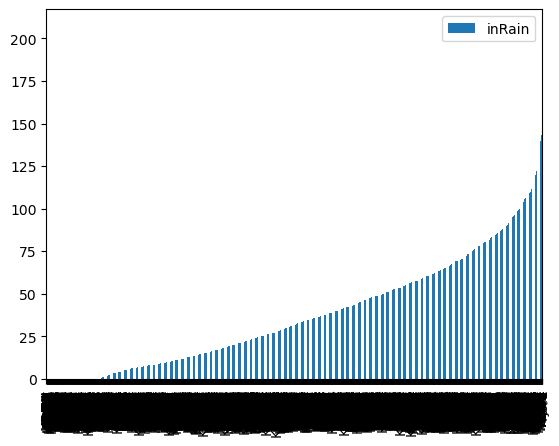

In [111]:
#generate bar graph for inRain
(aggregateData.sort_values('inRain')/7).plot.bar(y='inRain')

#ignore the demonic text at the bottom

<Axes: ylabel='daysRain'>

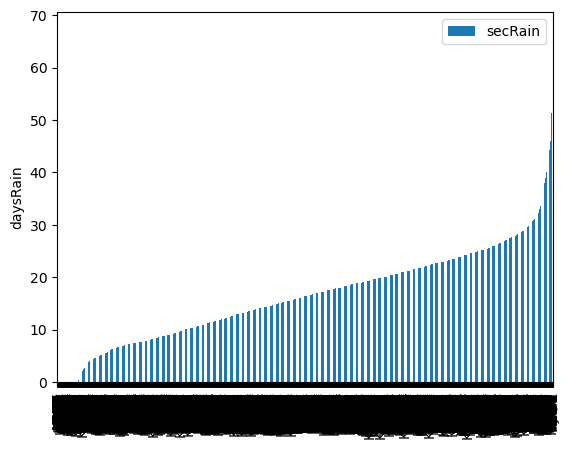

In [126]:
#generate bar graph for inRain
(aggregateData.sort_values('secRain')/3600/24/7).plot.bar(y='secRain', ylabel="daysRain")

<Axes: xlabel='secRain', ylabel='inRain'>

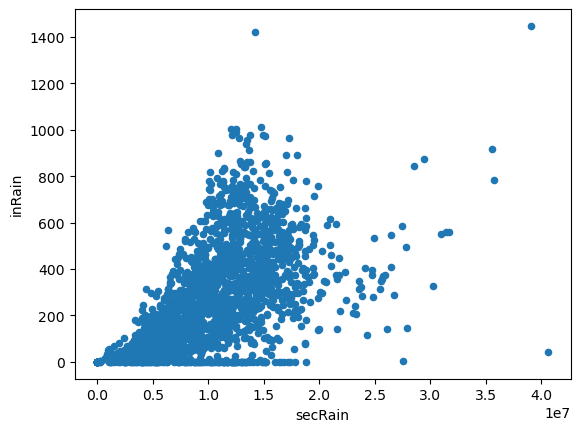

In [112]:
#generate scatterplot for rain
aggregateData.plot.scatter(x='secRain', y='inRain')

In [175]:
#finding the place with the best weather

count1=0
for i in range(2071):
    a = aggregateData.iloc[i]
    count1+=1
    if a.secCold/3600/24/7 > 0.5: #filter out too much severe cold
        count1-=1
        continue

    if a.inRain/7 > 35: # filter out too much rain
        count1-=1
        continue

    if a.inRain/7 < 25: # filter out not enough rain
        count1-=1
        continue

    if a.inSnow/7 < 5: # filter out no snow
        count1-=1
        continue
    
    if a.inSnow/7 > 18: # filter out too much snow
        count1-=1
        continue

    print(a.name)
        

print(count1)

KMCD
KPUW
KRQB
3
